# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

In [1]:
import pandas as pd
import csv
import xlwings as xw

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [3]:
df1 = pd.read_csv('D:\\code\\TOD_ID23-2\\data\\reviews_sample.csv')
df2 = pd.read_csv('D:\\code\\TOD_ID23-2\\data\\recipes_sample.csv')
df2 = df2[['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients']]
df2

,id,name,minutes,submitted,description,n_ingredients
0,44123,george s at the cove black bean soup,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,67664,healthy for them yogurt popsicles,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,38798,i can t believe it s spinach,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,35173,italian gut busters,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,84797,love is in the air beef fondue sauces,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,267661,zurie s holey rustic olive and cheddar bread,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,386977,zwetschgenkuchen bavarian plum cake,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,103312,zwiebelkuchen southwest german onion cake,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,486161,zydeco soup,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [4]:
recipes_sample = df2.sample(frac=0.05)
reviews_sample = df1.sample(frac=0.05)
recipes_sample

,id,name,minutes,submitted,description,n_ingredients
51,287778,jiffy deluxe pizza sticks,33,2008-02-23,recipe from a box of jiffy brand pizza crust m...,7.0
2310,294511,barbecued recipes grilled shrimp,190,2008-03-25,"barbecue recipes, formerly patio recipes revis...",7.0
26408,158588,super delicious and easy baked fish anykind,30,2006-03-04,this recipe was in my family forever! we love ...,4.0
15045,128493,jolean s killer spaghetti sauce,135,2005-07-03,this was my mom's recipe for spaghetti that be...,20.0
10908,286405,feta chicken salad,30,2008-02-13,simple ingredients and the addition of feta ch...,10.0
...,...,...,...,...,...,...
21921,90260,quick chunky greek pizza,30,2004-04-30,this recipe is quik and easy. it is low in fat...,NaN
28108,135174,tuna frittata,15,2005-08-29,a super quick mid-week meal that can be made w...,9.0
5858,171339,chicken noodle soup and dumplings,15,2006-06-05,"the fluffiest, biggest soup dumplings you'll e...",NaN
5596,23380,chicken and mushrooms with cheese,130,2002-03-28,"this dish was served at a party i went to, and...",NaN


In [5]:
with pd.ExcelWriter('recipes.xlsx', engine='openpyxl') as file:    
    recipes_sample.to_excel(file, sheet_name='Рецепты', index=False)
    reviews_sample.to_excel(file, sheet_name='Отзывы', index=False)

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [6]:
wb = xw.Book('recipes.xlsx')
sheet = wb.sheets['Рецепты']
sheet.range('G1').value = 'seconds_assign'
recipe_times = sheet.range('C2:C'+str(recipes_sample.shape[0])).value
recipe_sec = [time * 60 for time in recipe_times]

sheet.range('G2:G'+str(recipes_sample.shape[0])).options(transpose=True).value = recipe_sec

In [7]:
recipes_sample.shape[0]

1500

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [8]:
sheet.range('H1').value = 'secondsformula'

In [9]:
sheet.range('H2:H1501').formula = '=C2*60'

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [10]:
from xlwings.constants import AutoFillType

In [11]:
sheet.range('G1:H1').font.bold = True
#sheet['A1:H1'].api.horizontalalignment = xw.constants.HAlign.xlHAlignCenter

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [12]:
for i in sheet.range('C2:C1501'):
    if i.value < 5:
        i.color = (0, 255, 0)
    elif 5 <= i.value < 11:
        i.color = (255, 255, 0)
    else:
        i.color = (255, 0, 0)

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [13]:
sheet2 = wb.sheets['Отзывы']
sheet.range('I1').value = 'n_reviews'
recps = sheet.range('C2').expand('down').options(ndim=1).value
rgn_name = sheet2.range('D2').expand('down').address
c = 1
for i in recps:
    c += 1
    sheet.range('I' + str(c)).value = sheet2.formula = f'=COUNTIF(c:c, {i})'

sheet.autofit()

In [14]:
'=СЧЁТЕСЛИ(Отзывы!C2:C' + str(reviews_sample.shape[0] + 1) + ';A2)'

'=СЧЁТЕСЛИ(Отзывы!C2:C6336;A2)'

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [15]:
def validate(rating):
    wb.sheets['Отзывы'].activate() 
    try:
        assert 0 <= rating <= 5, 'Рейтин должен быть в пределах от 0 до 5!'

        rating_column = sheet2.range('E2').expand('down').value
        for ind,val in enumerate(rating_column):
            if val != rating:
                sheet2.range(f'A{ind+2}').expand('right').color = (255, 0, 0)
    except AssertionError as err:
        print(err)

In [16]:
validate(5)

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [18]:

#import csv

#with open('D:\\code\\TOD_ID23-2\\data\\recipes_model.csv', 'r') as file:
#    first_line = file.readline()
#    dialect = csv.Sniffer().sniff(first_line)
#   print('Разделитель в файле:', dialect.delimiter)

In [10]:
wb1 = xw.Book('D:\\code\\TOD_ID23-2\\data\\recipes_model.csv')
wb1.sheets[0].name = 'Модель'
sht3 = wb1.sheets['Модель']

In [14]:
with open('D:\\code\\TOD_ID23-2\\data\\recipes_model.csv', encoding='UTF-8') as file:
    sht3.range('A2').value = list(csv.reader(file, delimiter='	'))

In [13]:
sht3.autofit()

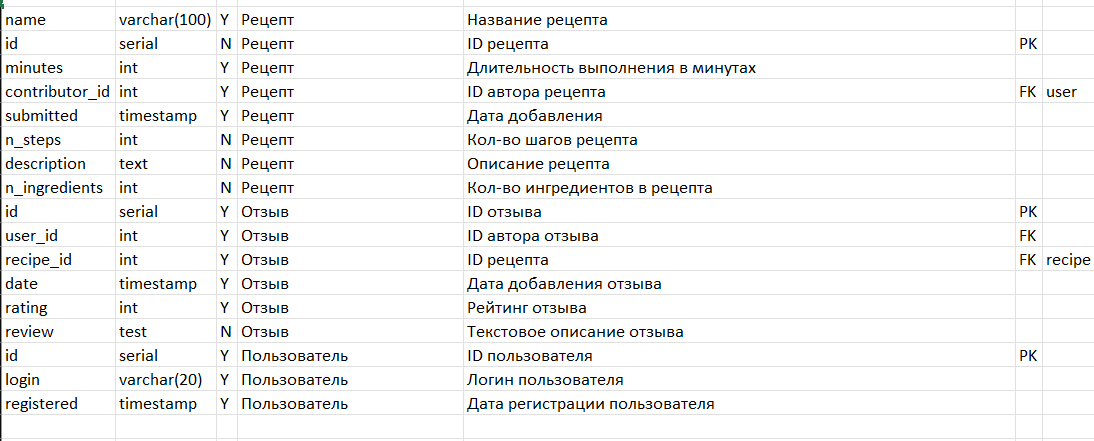

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [15]:
fml = '=CONCAT(B2, " ", UPPER(C2), " ", IF(G2 = "PK", "PRIMARY KEY", IF(G2 = "FK", CONCAT("REFERENCES", " ", H2, "(", I2, ")"),)), " ", IF(AND(D2="Y", G2<>"PK"), "NOT NULL",))'
sht3.range('J2:J18').formula = fml

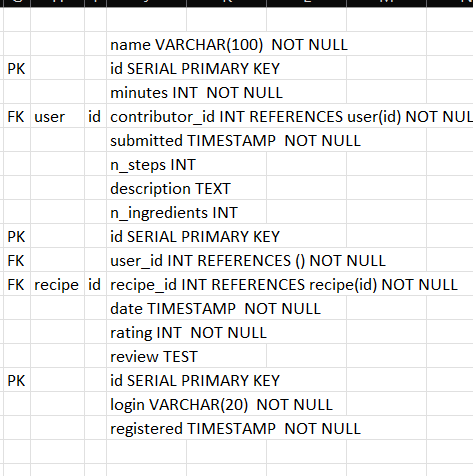

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [17]:
sht3.range('A2').expand('right').color = (0,204,255)

sht3.autofit()

sht3.range('A2').expand('right').font.bold = True

#sht3['A2:H2'].api.horizontalalignment = xw.constants.HAlign.xlHAlignCenter

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [19]:
wb1.sheets.add(name = 'Статистика', after = wb1.sheets[0].name) 

<Sheet [recipes_model.csv]Статистика>

In [20]:

sht4 = wb1.sheets['Статистика']

In [21]:
tables = sht3.range('A2').expand('down').value
atributes = sht3.range('B2').expand('down').value
df = pd.DataFrame({'Тип таблицы':tables, 'Количество':atributes}).groupby('Тип таблицы').count()
df

,Количество
Тип таблицы,
recipe,8
review,6
user,3


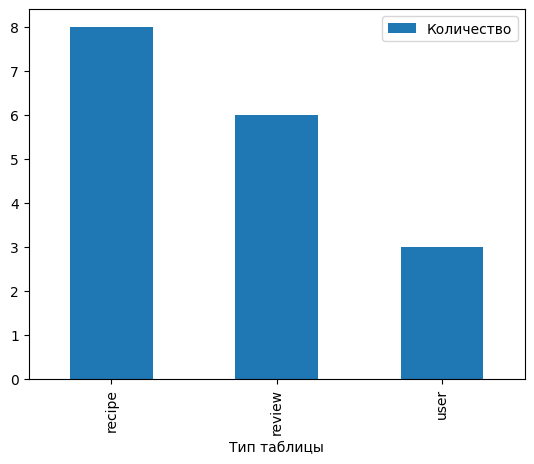

In [22]:
import matplotlib as plt

wb1.sheets['Статистика'].activate()
sht4.range('A1').value = df
graph = df.plot.bar()